In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
%matplotlib notebook

In [2]:
t = ascii.read('ASASSN-21qj_2013-2021.tbl')

In [3]:
t

ra,dec,sigra,sigdec,sigradec,w1mpro,w1sigmpro,w1snr,w1rchi2,w2mpro,w2sigmpro,w2snr,w2rchi2,nb,na,cc_flags,ph_qual,qual_frame,mjd,allwise_cntr,w1mpro_allwise,w1sigmpro_allwise,w2mpro_allwise,w2sigmpro_allwise,w3mpro_allwise,w3sigmpro_allwise,w4mpro_allwise,w4sigmpro_allwise,tmass_key,j_m_2mass,j_msig_2mass,h_m_2mass,h_msig_2mass,k_m_2mass,k_msig_2mass,dist,angle
deg,deg,arcsec,arcsec,arcsec,mag,mag,,,mag,mag,,,,,,,,mjdate,,mag,mag,mag,mag,mag,mag,mag,mag,,mag,mag,mag,mag,mag,mag,arcsec,deg
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,str4,str2,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64
123.8469618,-38.9898445,0.0466,0.0404,0.0027,11.334,0.02,53.6,15.42,11.043,0.03,36.1,3.276,1,0,0000,AA,5,58227.64203649,1238039401351044100,11.681,0.023,11.749,0.022,12.247,0.474,9.028,--,289913911,12.065,--,12.031,0.0393,11.987,0.0377,0.353289,249.417649
123.8469547,-38.9898618,0.037,0.0395,-0.0072,11.241,0.019,57.4,15.2,10.948,0.023,47.5,3.349,1,0,0000,AA,0,58801.02847317,1238039401351044100,11.681,0.023,11.749,0.022,12.247,0.474,9.028,--,289913911,12.065,--,12.031,0.0393,11.987,0.0377,0.397111,241.992339
123.8469391,-38.9898479,0.0376,0.0418,-0.0088,11.224,0.018,58.7,13.72,10.93,0.023,46.4,3.344,1,0,0000,AA,5,58800.57056616,1238039401351044100,11.681,0.023,11.749,0.022,12.247,0.474,9.028,--,289913911,12.065,--,12.031,0.0393,11.987,0.0377,0.417193,250.910784
123.8469325,-38.9898302,0.0384,0.037,-0.0089,11.239,0.019,56.0,12.93,10.916,0.023,46.9,3.377,1,0,0000,AA,5,58800.50524178,1238039401351044100,11.681,0.023,11.749,0.022,12.247,0.474,9.028,--,289913911,12.065,--,12.031,0.0393,11.987,0.0377,0.41908,260.007272
123.8469426,-38.9898564,0.0365,0.0368,0.0043,11.226,0.019,57.4,12.71,10.894,0.022,48.8,3.699,1,0,0000,AA,5,58436.76748992,1238039401351044100,11.681,0.023,11.749,0.022,12.247,0.474,9.028,--,289913911,12.065,--,12.031,0.0393,11.987,0.0377,0.419181,246.516145
123.8469303,-38.9898186,0.0387,0.0418,-0.0112,11.233,0.02,53.0,12.48,10.941,0.023,47.9,3.789,1,0,0000,AA,10,58593.93732355,1238039401351044100,11.681,0.023,11.749,0.022,12.247,0.474,9.028,--,289913911,12.065,--,12.031,0.0393,11.987,0.0377,0.420025,265.772827
123.8469321,-38.9898533,0.0395,0.0453,-0.0132,11.236,0.02,54.5,16.15,10.902,0.023,47.0,3.608,1,0,0000,AA,5,58800.04720753,1238039401351044100,11.681,0.023,11.749,0.022,12.247,0.474,9.028,--,289913911,12.065,--,12.031,0.0393,11.987,0.0377,0.442223,249.360342
123.8469307,-38.9898532,0.0386,0.0352,-0.0115,11.224,0.018,61.9,15.69,10.883,0.023,48.2,3.19,1,0,0000,AA,10,58436.24400282,1238039401351044100,11.681,0.023,11.749,0.022,12.247,0.474,9.028,--,289913911,12.065,--,12.031,0.0393,11.987,0.0377,0.445765,249.581125


<IPython.core.display.Javascript object>


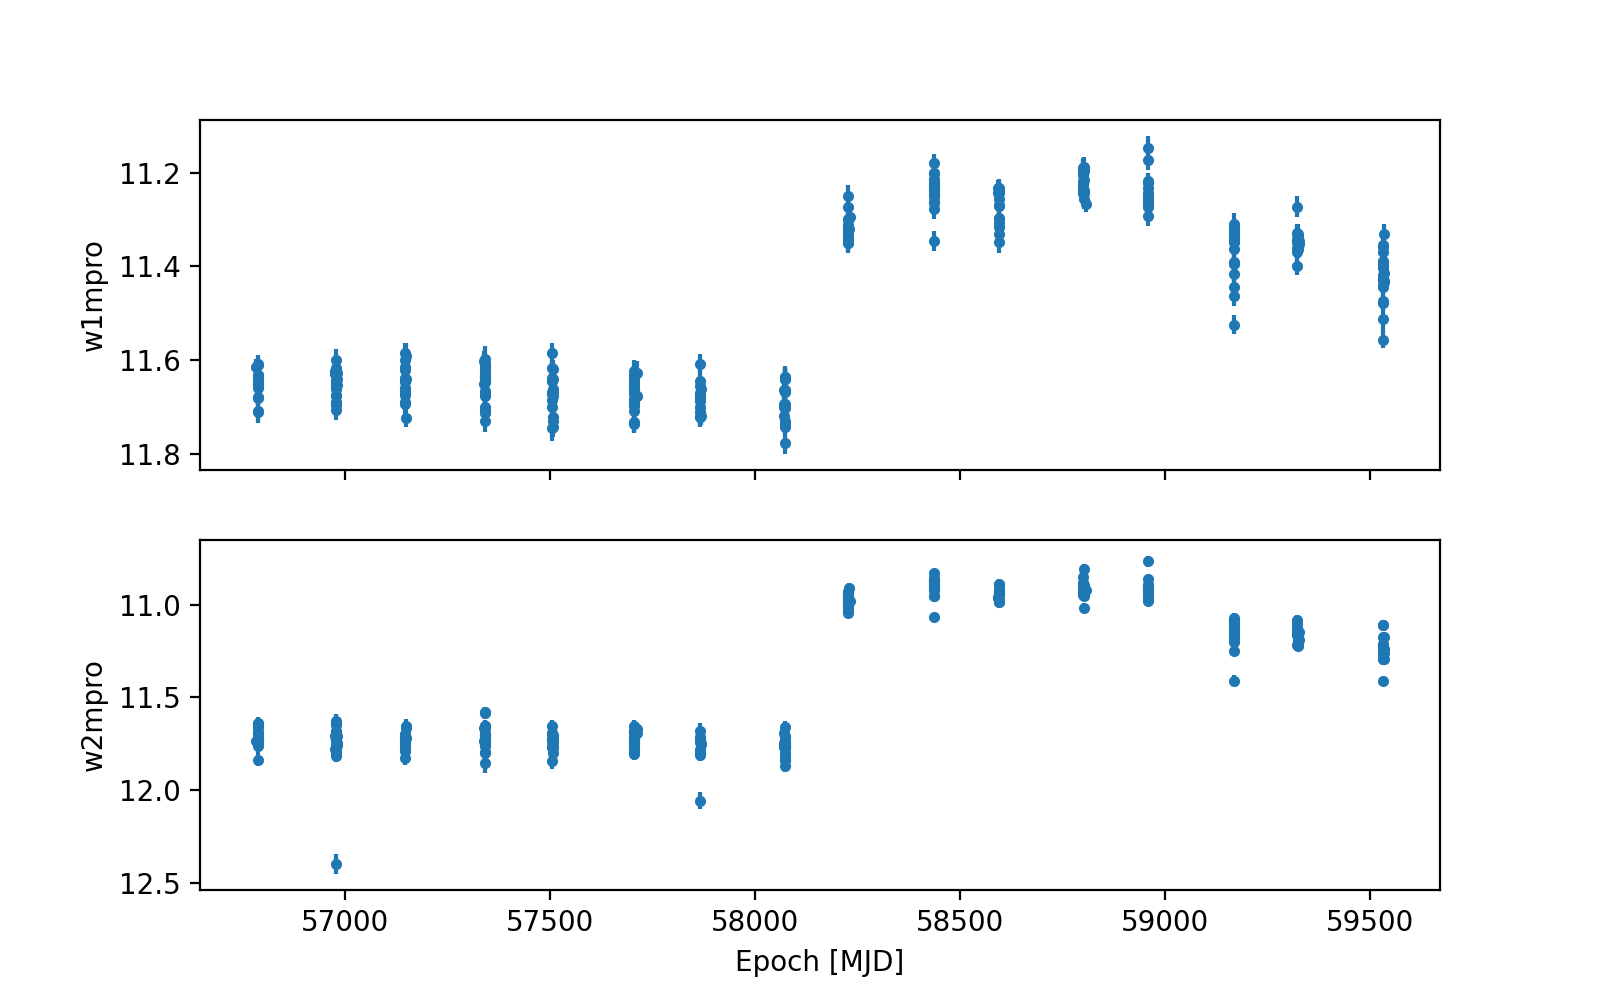

Text(0, 0.5, 'w2mpro')

In [4]:
fig, ax = plt.subplots(2,1,figsize=(8,5),sharex=True)
ax[0].errorbar(t['mjd'],t['w1mpro'],yerr=t['w1sigmpro'],fmt='.')
ax[0].invert_yaxis()
ax[1].errorbar(t['mjd'],t['w2mpro'],yerr=t['w2sigmpro'],fmt='.')
ax[1].invert_yaxis()
ax[1].set_xlabel('Epoch [MJD]')
ax[0].set_ylabel('w1mpro')
ax[1].set_ylabel('w2mpro')

## calculate weighted mean at each epoch



<IPython.core.display.Javascript object>


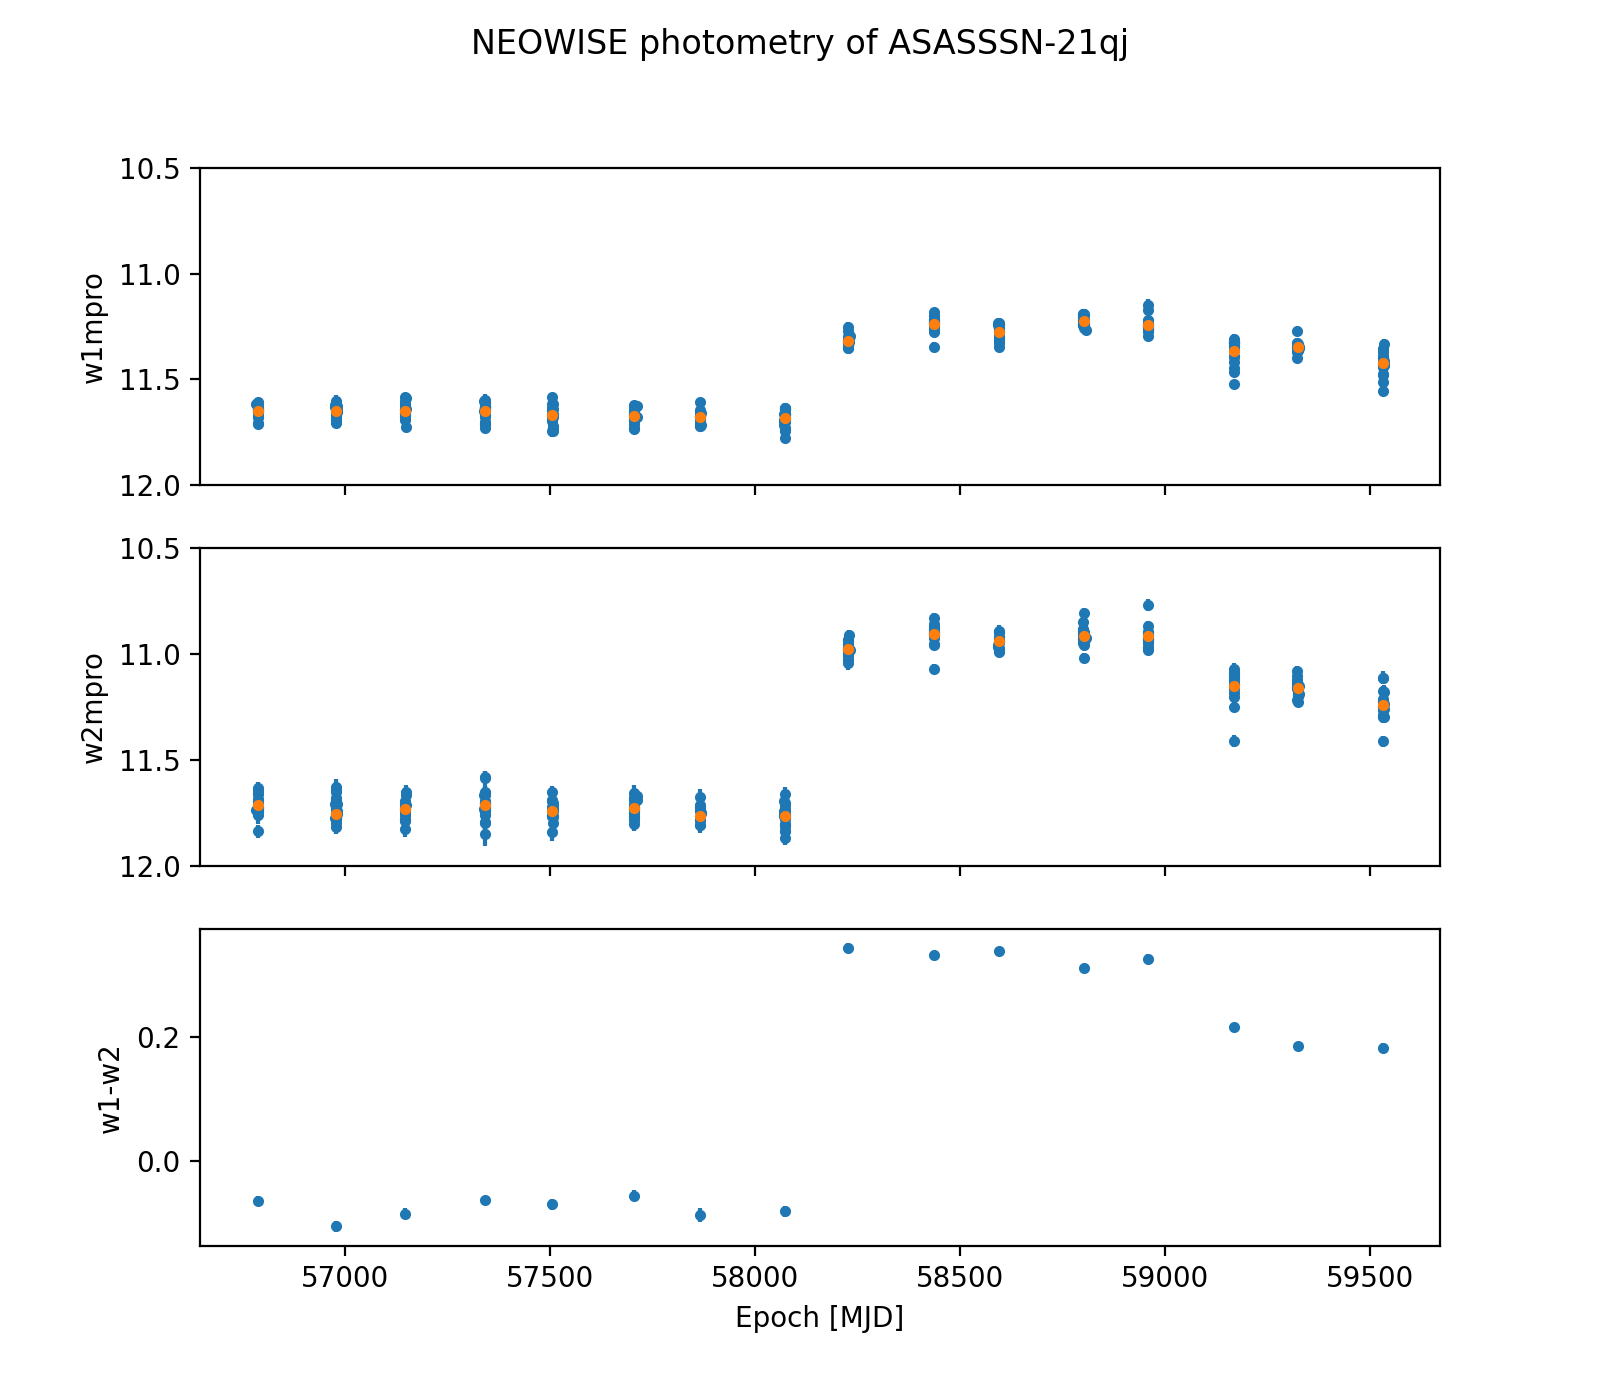

[-0.06463157894736504+/-0.00854708322054649
 -0.1056363636363642+/-0.008531298720080058
 -0.08544444444444466+/-0.00904532482747678
 -0.0637037037037036+/-0.007636099378440615
 -0.0705000000000009+/-0.008923543557893892
 -0.05604545454545118+/-0.008697867127174538
 -0.08733333333333348+/-0.010676245698850426
 -0.08125000000000071+/-0.008862843787408191
 0.3427647058823542+/-0.007535383661129355
 0.3310526315789488+/-0.006927803391681596
 0.3371999999999975+/-0.007867796529030363
 0.31104545454545374+/-0.006436755252595687
 0.32588235294117496+/-0.0074548235702575705
 0.2151999999999994+/-0.007318469785412795
 0.1842499999999987+/-0.007145628033979938
 0.1823809523809512+/-0.00734414787000561]


In [5]:
fig, ax = plt.subplots(3,1,figsize=(8,7),sharex=True)
ax[0].errorbar(t['mjd'],t['w1mpro'],yerr=t['w1sigmpro'],fmt='.')
ax[0].invert_yaxis()
ax[1].errorbar(t['mjd'],t['w2mpro'],yerr=t['w2sigmpro'],fmt='.')
ax[1].invert_yaxis()

ax[2].set_xlabel('Epoch [MJD]')
ax[0].set_ylabel('w1mpro')
ax[1].set_ylabel('w2mpro')
ax[2].set_ylabel('w1-w2')
ax[0].set_ylim(12,10.5)
ax[1].set_ylim(12,10.5)
import uncertainties
from uncertainties.umath import *
from uncertainties import unumpy
from uncertainties import umath

t_s = 56787
t_e = 59532
nmag = 16

wt = np.zeros(nmag)
w1 = unumpy.uarray(wt,wt)
w2 = unumpy.uarray(wt,wt)
wcol = unumpy.uarray(wt,wt)

for (j,i) in enumerate(np.linspace(t_s, t_e, 16)):
#    ax[0].scatter(i-60,11.4)
#    ax[0].scatter(i+60,11.4)
#    ax[1].scatter(i-60,11.4)
#    ax[1].scatter(i+60,11.4)
    m = (t['mjd']>(i-60))*(t['mjd']<(i+60))

    w_time = t['mjd'][m]

    w1_mag = t['w1mpro'][m]
    w1_sig = t['w1sigmpro'][m]
    w2_mag = t['w2mpro'][m]
    w2_sig = t['w2sigmpro'][m]
    
    w1all = unumpy.uarray(w1_mag, w1_sig)
    w2all = unumpy.uarray(w2_mag, w2_sig)

    w1mean = w1all.mean()
    w2mean = w2all.mean()

    w1w2col = w1mean-w2mean

    w1[j] = w1mean
    w2[j] = w2mean
    wcol[j] = w1w2col
    wt[j] = np.average(t['mjd'][m])

ax[0].errorbar(wt,unumpy.nominal_values(w1),yerr=unumpy.std_devs(w1),fmt='.')
ax[1].errorbar(wt,unumpy.nominal_values(w2),yerr=unumpy.std_devs(w2),fmt='.')
ax[2].errorbar(wt,unumpy.nominal_values(wcol),yerr=unumpy.std_devs(wcol),fmt='.')
fig.suptitle("NEOWISE photometry of ASASSSN-21qj")
print(wcol)
fig.savefig("NEOWISE_ASASSN-21dj.pdf")

In [6]:
ta = ascii.read('../atlas/job211831.txt')

In [7]:
ta

##MJD,m,dm,uJy,duJy,F,err,chi/N,RA,Dec,x,y,maj,min,phi,apfit,mag5sig,Sky,Obs
float64,float64,float64,int64,int64,str1,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str14
58037.635279,13.616,0.003,12984,44,o,0,1718.56,123.84754,-38.98983,1666.5,4612.12,2.32,2.21,-22.2,-0.42,18.66,19.35,02a58037o0713o
58039.63801,13.439,0.004,15291,59,o,0,86.94,123.84754,-38.98983,8060.02,8967.11,4.2,3.69,-86.6,-0.37,18.1,19.16,01a58039o0815o
58043.620328,20.588,1.354,21,29,o,0,0.95,123.84754,-38.98983,46.93,7347.44,3.91,3.15,-89.3,-0.341,18.76,20.25,01a58043o0925o
58043.635532,13.43,0.003,15422,49,o,0,184.48,123.84754,-38.98983,9857.76,7280.27,4.6,3.77,-87.8,-0.359,18.53,20.06,01a58043o0958o
58043.636446,13.426,0.003,15475,51,o,0,161.93,123.84754,-38.98983,9840.63,7238.81,4.68,3.72,-88.0,-0.367,18.38,19.86,01a58043o0960o
58043.639675,13.497,0.004,14497,61,o,0,168.0,123.84754,-38.98983,64.1,7326.84,4.09,3.4,-88.3,-0.356,18.23,19.59,01a58043o0967o
58043.651311,13.46,0.011,15000,165,o,0,17.55,123.84754,-38.98983,64.89,7171.18,3.74,3.01,87.7,-0.357,16.97,17.38,01a58043o0992o
58043.652293,13.402,0.041,15816,650,o,0,1.55,123.84754,-38.98983,9879.37,7263.1,4.18,3.15,-88.0,-0.461,16.61,17.02,01a58043o0994o
58047.621296,13.479,0.003,14735,45,o,0,455.64,123.84754,-38.98983,7108.79,6810.81,3.8,3.16,-83.7,-0.417,18.71,20.07,01a58047o0931o


<IPython.core.display.Javascript object>


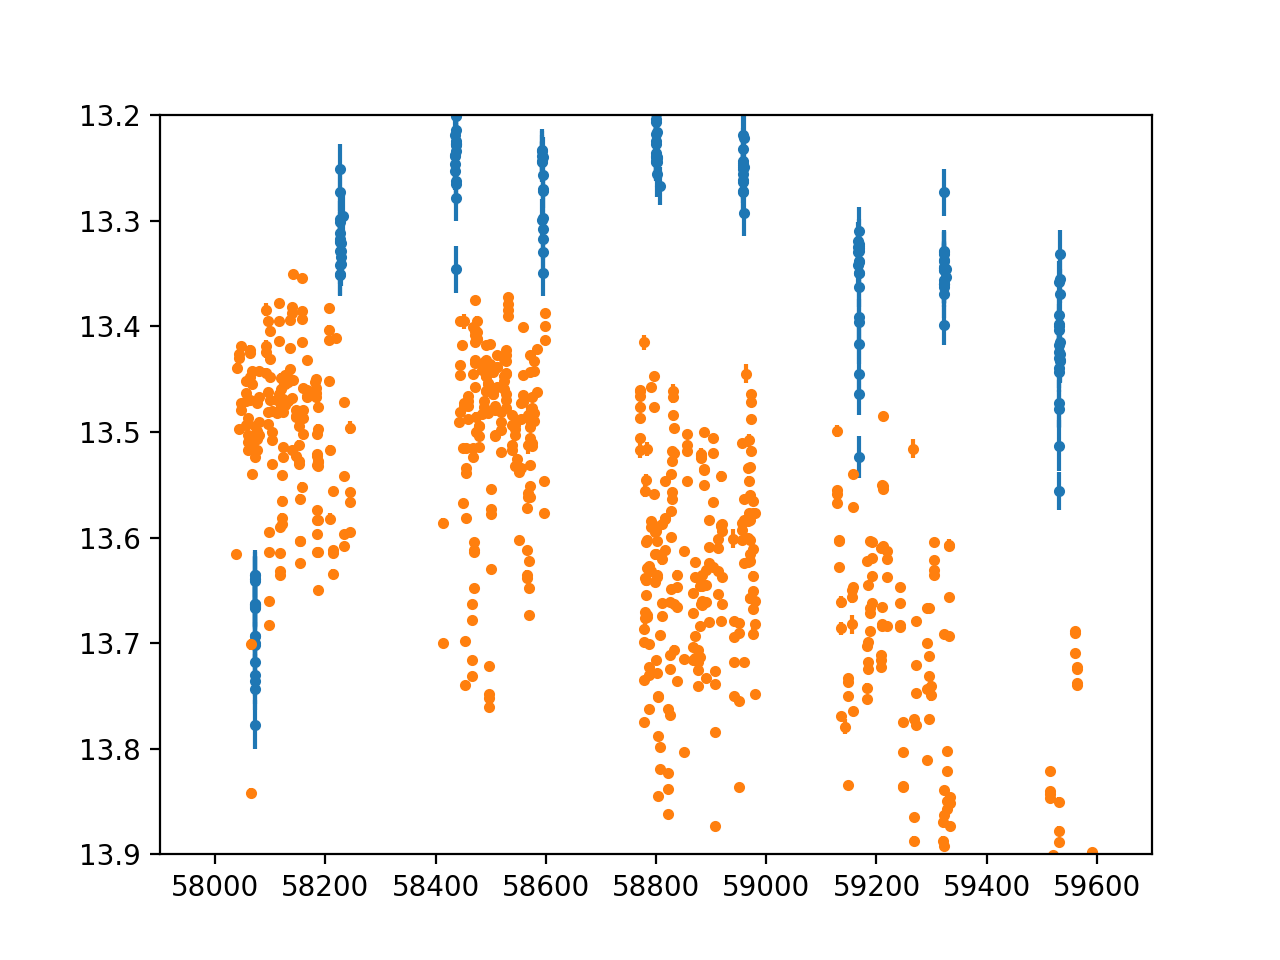

(13.9, 13.2)

In [8]:
%matplotlib notebook
plt.errorbar(t['mjd'],t['w1mpro']+2,yerr=t['w1sigmpro'],fmt='.')

ta = ta[(ta['dm']<0.01)]

fo = (ta['F']=='o')
fc = (ta['F']=='c')
plt.errorbar(ta['##MJD'][fo],ta['m'][fo],ta['dm'][fo],fmt='.')
#plt.errorbar(ta['##MJD'][fc],ta['m'][fc],ta['dm'][fc],fmt='.')
plt.xlim(57900,59700)

plt.ylim(13.9,13.2)